# Comparision of Three Algorithms (Linear, Logistic, Decision Tree) using China Cancer Patient Dataset

In [1]:
# Import the necessaary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/DataSets/china_cancer_patients_synthetic.csv")
data

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,2018-11-14,12,0,Alive,57,Never,Occasional,KRAS,Hypertension
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,2016-09-03,20,0,Alive,36,Never,NaN,NaN,Hepatitis B
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,2019-11-29,0,0,Alive,35,Former,Occasional,NaN,"Hepatitis B, Hypertension"
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,NaN,2,0,Alive,25,Current,Occasional,KRAS,NaN


In [3]:
# To find the shape of the data

data.shape

(10000, 20)

In [4]:
# To find the null values present or not

data.isna()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9998,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True


In [5]:
# To view the info() about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths      

In [6]:
# To view values of the data of SurvivalStatus

data.SurvivalStatus.value_counts()

SurvivalStatus
Alive       7790
Deceased    2210
Name: count, dtype: int64

In [7]:
# To count the null values present or not

data.isna().sum()

PatientID                  0
Gender                     0
Age                        0
Province                   0
Ethnicity                  0
TumorType                  0
CancerStage                0
DiagnosisDate              0
TumorSize                  0
Metastasis                 0
TreatmentType              0
SurgeryDate             5673
ChemotherapySessions       0
RadiationSessions          0
SurvivalStatus             0
FollowUpMonths             0
SmokingStatus              0
AlcoholUse              5921
GeneticMutation         7200
Comorbidities           3715
dtype: int64

In [8]:
# To view the dimension of the data

data.ndim

2

In [9]:
data

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,2018-11-14,12,0,Alive,57,Never,Occasional,KRAS,Hypertension
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,2016-09-03,20,0,Alive,36,Never,NaN,NaN,Hepatitis B
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,2019-11-29,0,0,Alive,35,Former,Occasional,NaN,"Hepatitis B, Hypertension"
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,NaN,2,0,Alive,25,Current,Occasional,KRAS,NaN


In [10]:
# To Split the data into training and testing

x = data[['Gender', 'Age', 'TumorType', 'CancerStage', 'TumorSize', 'TreatmentType', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths','SmokingStatus']]
x

,Gender,Age,TumorType,CancerStage,TumorSize,TreatmentType,ChemotherapySessions,RadiationSessions,FollowUpMonths,SmokingStatus
0,Male,32,Lung,I,8.2,Radiation,0,23,44,Current
1,Male,66,Lung,IV,9.5,Chemotherapy,11,0,57,Never
2,Other,26,Lung,III,9.3,Surgery,0,0,40,Former
3,Other,35,Breast,III,7.7,Surgery,0,0,45,Never
4,Male,32,Stomach,II,7.3,Chemotherapy,4,0,42,Never
...,...,...,...,...,...,...,...,...,...,...
9995,Female,21,Liver,IV,8.5,Targeted Therapy,12,0,57,Never
9996,Female,35,Cervical,II,6.5,Targeted Therapy,20,0,36,Never
9997,Female,58,Cervical,III,8.0,Immunotherapy,0,0,35,Former
9998,Male,26,Lung,I,6.2,Chemotherapy,2,0,25,Current


In [11]:
# To change the string data into numercical data

from sklearn.preprocessing import LabelEncoder

In [12]:
# create an object for Sex using label encoder

Le_Gender = LabelEncoder()
Le_TumorType = LabelEncoder()
Le_CancerStage	 = LabelEncoder()
Le_TreatmentType = LabelEncoder()
Le_SmokingStatus = LabelEncoder()

In [13]:
# To apply the label encoder to change the string values into numerical values

x['Gender'] = Le_Gender.fit_transform(x['Gender'])
x['TumorType'] = Le_TumorType.fit_transform(x['TumorType'])
x['CancerStage'] = Le_CancerStage.fit_transform(x['CancerStage'])
x['TreatmentType'] = Le_TreatmentType.fit_transform(x['TreatmentType'])
x['SmokingStatus'] = Le_SmokingStatus.fit_transform(x['SmokingStatus'])

C:\Users\HP\AppData\Local\Temp\ipykernel_9316\1142730961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender'] = Le_Gender.fit_transform(x['Gender'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9316\1142730961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['TumorType'] = Le_TumorType.fit_transform(x['TumorType'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9316\1142730961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [14]:
x

,Gender,Age,TumorType,CancerStage,TumorSize,TreatmentType,ChemotherapySessions,RadiationSessions,FollowUpMonths,SmokingStatus
0,1,32,4,0,8.2,2,0,23,44,0
1,1,66,4,3,9.5,0,11,0,57,2
2,2,26,4,2,9.3,3,0,0,40,1
3,2,35,0,2,7.7,3,0,0,45,2
4,1,32,5,1,7.3,0,4,0,42,2
...,...,...,...,...,...,...,...,...,...,...
9995,0,21,3,3,8.5,4,12,0,57,2
9996,0,35,1,1,6.5,4,20,0,36,2
9997,0,58,1,2,8.0,1,0,0,35,1
9998,1,26,4,0,6.2,0,2,0,25,0


In [15]:
# To view the info() about the data

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                10000 non-null  int32  
 1   Age                   10000 non-null  int64  
 2   TumorType             10000 non-null  int32  
 3   CancerStage           10000 non-null  int32  
 4   TumorSize             10000 non-null  float64
 5   TreatmentType         10000 non-null  int32  
 6   ChemotherapySessions  10000 non-null  int64  
 7   RadiationSessions     10000 non-null  int64  
 8   FollowUpMonths        10000 non-null  int64  
 9   SmokingStatus         10000 non-null  int32  
dtypes: float64(1), int32(5), int64(4)
memory usage: 586.1 KB


In [16]:
# To count the null values present or not

x.isna().sum()

Gender                  0
Age                     0
TumorType               0
CancerStage             0
TumorSize               0
TreatmentType           0
ChemotherapySessions    0
RadiationSessions       0
FollowUpMonths          0
SmokingStatus           0
dtype: int64

In [17]:
y = data['SurvivalStatus']
y

0          Alive
1       Deceased
2          Alive
3       Deceased
4          Alive
          ...   
9995       Alive
9996       Alive
9997       Alive
9998       Alive
9999    Deceased
Name: SurvivalStatus, Length: 10000, dtype: object

In [18]:
# create an object for Sex using label encoder

Le_SurvivalStatus = LabelEncoder()

In [19]:
y = data['SurvivalStatus']
y

0          Alive
1       Deceased
2          Alive
3       Deceased
4          Alive
          ...   
9995       Alive
9996       Alive
9997       Alive
9998       Alive
9999    Deceased
Name: SurvivalStatus, Length: 10000, dtype: object

In [20]:
# Fit-transform y (a Series) directly, and overwrite y (or assign back into your DataFrame)
y = Le_SurvivalStatus.fit_transform(y)

In [21]:
y

array([0, 1, 0, ..., 0, 0, 1])

# Linear Regression

In [22]:
# To split the x and y data into training data  and testing data for a machine training purpose 

from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2)

In [24]:
# To print the shape of x train , test, ytrain, test

x_train.shape

(8000, 10)

In [25]:
x_test.shape

(2000, 10)

In [26]:
y_train.shape

(8000,)

In [27]:
y_test.shape

(2000,)

In [28]:
# To view the dimension of x_train

x_train.ndim

2

In [29]:
# To view the dimension of y_train

y_train.ndim

1

In [30]:
# Import LinearRegression from the packages of scikit learn 

from sklearn.linear_model import LinearRegression

# creating an object for an algorithm

LR = LinearRegression()

In [31]:
# To create a model fit and loading the data which are the data we want to print / or to load model
# x = 2 dimensional, y 1 dimensional

LR.fit(x, y)

LinearRegression()

In [32]:
# To predict the values "Price"
# 1.

LR.predict(x)

array([-0.05450261,  0.57383034,  0.35574281, ...,  0.35550333,
       -0.06580346,  0.34377342])

In [33]:
# To find the "Slope" value or "m" value

LR.coef_

array([ 7.86566644e-04,  2.99090172e-04,  2.65268585e-03,  2.09120085e-01,
        7.84603488e-04, -4.80159106e-04, -4.17117733e-04,  3.14307020e-04,
        4.39010581e-05,  3.49854824e-05])

In [34]:
# To find the "Intercept" value or "b" value

LR.intercept_

-0.09010494487349832

# Applying formula y = m1x + m2x + m3x + b

In [35]:
# 1.

y = (7.86566644 * 2) + (2.99090172 * 55) + (2.65268585 * 5) + (2.09120085 * 3) + (7.84603488 * 5.5) + (-4.80159106 * 2) +(-4.17117733 * 15) + (3.14307020 * 5) + (4.39010581 * 22) + (3.49854824 * 0) + (-0.09010494487349832)
y

282.9578829251265

In [36]:
# 2. To predict the Price value 
# Gender = 2, Age = 55, TumorType = 5, CancerStage = 3, TumorSize = 5.5, TreatmentType = 2, ChemotherapySessions = 15, 
# RadiationSessions = 5, FollowUpMonths = 22, SmokingStatus = 0           

LR.predict([[2, 55, 5, 3, 5.5, 2, 15, 5, 22, 0]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.56817742])

In [37]:
# 3.

y = (7.86566644 * 1) + (2.99090172 * 35) + (2.65268585 * 2) + (2.09120085 * 4) + (7.84603488 * 2.1) + (-4.80159106 * 3) +(-4.17117733 * 25) + (3.14307020 * 15) + (4.39010581 * 60) + (3.49854824 * 2) + (-0.09010494487349832)
y

341.46926169312655

In [38]:
# 4. To predict the Price value 
# Gender = 1, Age = 35, TumorType = 2, CancerStage = 4, TumorSize = 2.1, TreatmentType = 3, ChemotherapySessions = 25, 
# RadiationSessions = 15, FollowUpMonths = 60, SmokingStatus = 2

LR.predict([[1, 35, 2, 4, 2.1, 3, 25, 15, 60, 2]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.76013337])

In [39]:
# Predicted values

LR.predict(x_test)

array([ 0.3738633 ,  0.56215446, -0.07219257, ...,  0.1521943 ,
        0.14661288, -0.0538129 ])

In [40]:
# To store the predicted values of x_test in "y_pred"

y_pred = LR.predict(x_test)
y_pred

array([ 0.3738633 ,  0.56215446, -0.07219257, ...,  0.1521943 ,
        0.14661288, -0.0538129 ])

In [41]:
# To find the accuracy of the model using "Score"
# here we use test data only

LR.score(x_test, y_test)

0.29528886795611176

In [42]:
# To print the first 5 values of actual values
# The actual values or label values of x_test stored in y_test

print(y_test[0:10])

[0 0 0 1 0 0 1 0 1 1]


In [43]:
# To print the first 5 values of predicted values
# The actual values or label values of x_train stored in y_train

print(y_pred[0:10])

[ 0.3738633   0.56215446 -0.07219257  0.34923446  0.14705232  0.14331469
  0.35681218  0.14412872  0.55839915  0.36278054]


In [44]:
# To draw a confusion matrix , we "import confusion_matrix" the package from sklearn 

from sklearn.metrics import confusion_matrix

In [45]:
# # Create a variable "cm" for stored a matrix

# cm = confusion_matrix(y_test, y_pred)
# cm

In [46]:
# To view the dimension for 'y_pred' 
y_pred.ndim

1

In [47]:
# If y_pred contains probabilities, convert them to class labels first:
# This assumes binary classification (0 or 1)
import numpy as np

# Convert probabilities to class labels if needed

if y_pred.ndim > 1 or np.any((y_pred > 1) | (y_pred < 0)):
    y_pred = np.where(y_pred >= 0.5, 1, 0)

# Now calculate the confusion matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1390  137]
 [ 305  168]]


In [48]:
# Accuracy b/w model test and prediction
# Import this first
from sklearn.metrics import accuracy_score 

# Assuming `y_test` is your actual labels, and `y_pred` is your model's predicted labels

Linear_Accuracy = accuracy_score(y_test, y_pred)
print("Linear_Accuracy:", Linear_Accuracy)

Linear_Accuracy: 0.779


In [49]:
# For viewing the classification report for the prediction, we have to import

from sklearn.metrics import classification_report

In [50]:
# To print the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1527
           1       0.55      0.36      0.43       473

    accuracy                           0.78      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.76      0.78      0.76      2000



In [51]:
# import seaborn to visualize it in graphical format

import seaborn as sns

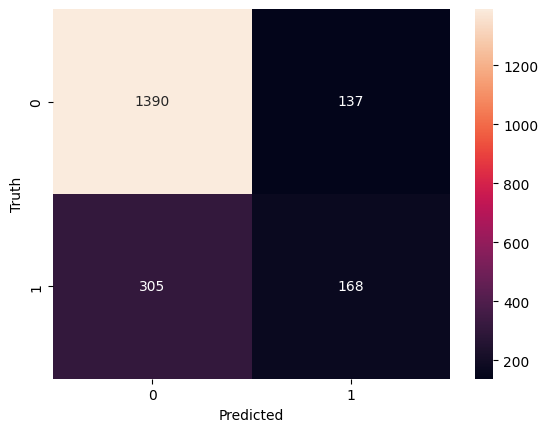

In [52]:
#1. To plot the heatmap for the above array

# cmap='magma': Optional – gives the color scheme as in your image. 
# You can replace it with any other like 'coolwarm', 'Blues', etc.

 # fmt='d' ensures integer formatting

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Logistic Regression

In [53]:
# Import LogisticRegression from the packages of scikit learn 

from sklearn.linear_model import LogisticRegression

# creating an object for an algorithm

Log = LogisticRegression()

In [54]:
# To create a model fit and loading the data which are the data we want to print / or to load model
# x = 2 dimensional, y = 1 dimensional
# here we use training data only

Log.fit(x_train, y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
# To find the accuracy of the model using "Score"
# here we use test data only

Log.score(x_test, y_test)

0.779

In [56]:
# To predict the particular values of "X"

Log.predict(x)

array([0, 1, 0, ..., 0, 0, 0])

In [57]:
# To predict the values of "x_test"

Log.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0])

In [58]:
# To store the predicted values of x_test in "a"

a = Log.predict(x_test)
a

array([0, 1, 0, ..., 0, 0, 0])

In [59]:
# 1. To predict the Price value 
# Gender = 2, Age = 55, TumorType = 5, CancerStage = 3, TumorSize = 5.5, TreatmentType = 2, ChemotherapySessions = 15, 
# RadiationSessions = 5, FollowUpMonths = 22, SmokingStatus = 0           

Log.predict([[2, 55, 5, 3, 5.5, 2, 15, 5, 22, 0]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [60]:
# 2. To predict the Price value 
# Gender = 1, Age = 35, TumorType = 2, CancerStage = 4, TumorSize = 2.1, TreatmentType = 3, ChemotherapySessions = 25, 
# RadiationSessions = 15, FollowUpMonths = 60, SmokingStatus = 2

Log.predict([[1, 35, 2, 4, 2.1, 3, 25, 15, 60, 2]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [61]:
# To print the first 5 values of actual values
# The actual values or label values of x_test stored in y_test

print(y_test[0:10])

[0 0 0 1 0 0 1 0 1 1]


In [62]:
# To print the first 5 values of predicted values
# The actual values or label values of x_train stored in y_train

print(a[0:10])

[0 1 0 0 0 0 0 0 1 0]


In [63]:
# Accuracy b/w model test and prediction
# # Import this first
# from sklearn.metrics import accuracy_score 

# Assuming `y_test` is your actual labels, and `a` is your model's predicted labels

Logistic_Accuracy = accuracy_score(y_test, a)
print("Logistic_Accuracy:", Logistic_Accuracy)

Logistic_Accuracy: 0.779


In [64]:
# # To draw a confusion matrix , we "import confusion_matrix" the package from sklearn 

# from sklearn.metrics import confusion_matrix

In [65]:
# Create a variable "cm" for stored a matrix

cm = confusion_matrix(y_test, a)
cm

array([[1390,  137],
       [ 305,  168]], dtype=int64)

In [66]:
# For viewing the classification report for the prediction, we have to import

from sklearn.metrics import classification_report

In [67]:
# To print the classification report

print(classification_report(y_test, a))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1527
           1       0.55      0.36      0.43       473

    accuracy                           0.78      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.76      0.78      0.76      2000



In [68]:
# import seaborn to visualize it in graphical format

import seaborn as sns

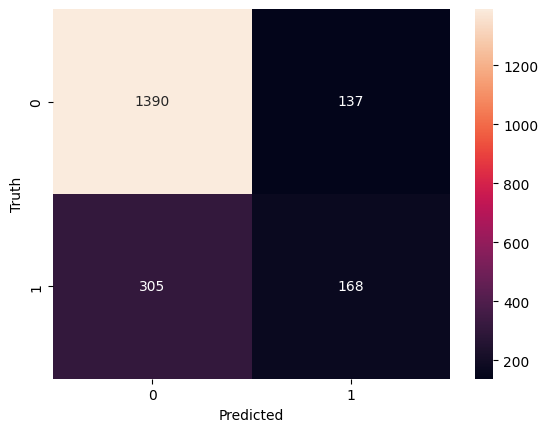

In [69]:
#1. To plot the heatmap for the above array

# cmap='magma': Optional – gives the color scheme as in your image. 
# You can replace it with any other like 'coolwarm', 'Blues', etc.

 # fmt='d' ensures integer formatting
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Decision Tree Classifier

In [70]:
# To import decision tree classifier from the packages sklearn

from sklearn.tree import DecisionTreeClassifier

# creating an object for an algorithm

Log_Tree = DecisionTreeClassifier()

In [71]:
# To create a model fit and loading the data which are the data we want to print / or to load model
# x = 2 dimensional, y = 1 dimensional
# here we use training data only

Log_Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [72]:
# To find the accuracy of the model using "Score"
# here we use test data only

Log_Tree.score(x_test, y_test)

0.772

In [73]:
# To predict the particular values of "X"

Log_Tree.predict(x)

array([0, 1, 0, ..., 0, 0, 1])

In [74]:
# To predict the values of "x_test"

Log_Tree.predict(x_test)

array([1, 1, 0, ..., 0, 0, 0])

In [75]:
# To store the predicted values of x_test in "b"

b = Log.predict(x_test)
b

array([0, 1, 0, ..., 0, 0, 0])

In [76]:
# 1. To predict the Price value 
# Gender = 2, Age = 55, TumorType = 5, CancerStage = 3, TumorSize = 5.5, TreatmentType = 2, ChemotherapySessions = 15, 
# RadiationSessions = 5, FollowUpMonths = 22, SmokingStatus = 0           

Log_Tree.predict([[2, 55, 5, 3, 5.5, 2, 15, 5, 22, 0]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [77]:
# 2. To predict the Price value 
# Gender = 1, Age = 35, TumorType = 2, CancerStage = 4, TumorSize = 2.1, TreatmentType = 3, ChemotherapySessions = 25, 
# RadiationSessions = 15, FollowUpMonths = 60, SmokingStatus = 2

Log_Tree.predict([[1, 35, 2, 4, 2.1, 3, 25, 15, 60, 2]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [78]:
# To print the first 5 values of actual values
# The actual values or label values of x_test stored in y_test

print(y_test[0:10])

[0 0 0 1 0 0 1 0 1 1]


In [79]:
# To print the first 5 values of predicted values
# The actual values or label values of x_train stored in y_train

print(b[0:10])

[0 1 0 0 0 0 0 0 1 0]


In [80]:
# Accuracy b/w model test and prediction

# # Import this first
# from sklearn.metrics import accuracy_score 

# Assuming `y_test` is your actual labels, and `b` is your model's predicted labels

Decision_Tree_Accuracy = accuracy_score(y_test, b)
print("Decision Tree Accuracy:", Decision_Tree_Accuracy)

Decision Tree Accuracy: 0.779


In [81]:
# # To draw a confusion matrix , we "import confusion_matrix" the package from sklearn 

# from sklearn.metrics import confusion_matrix

In [82]:
# Create a variable "cm" for stored a matrix

cm = confusion_matrix(y_test, b)
cm

array([[1390,  137],
       [ 305,  168]], dtype=int64)

In [83]:
# # For viewing the classification report for the prediction, we have to import

# from sklearn.metrics import classification_report

In [84]:
# To print the classification report

print(classification_report(y_test, b))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1527
           1       0.55      0.36      0.43       473

    accuracy                           0.78      2000
   macro avg       0.69      0.63      0.65      2000
weighted avg       0.76      0.78      0.76      2000



In [85]:
# # import seaborn to visualize it in graphical format

# import seaborn as sns

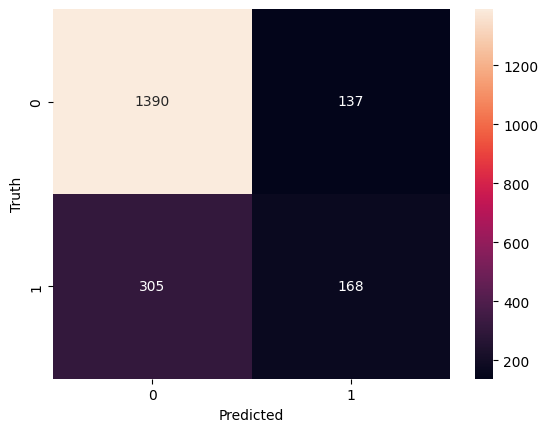

In [86]:
#1. To plot the heatmap for the above array

# cmap='magma': Optional – gives the color scheme as in your image. 
# You can replace it with any other like 'coolwarm', 'Blues', etc.

 # fmt='d' ensures integer formatting
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

# Model Comparision

In [87]:
# first we install "plotly" here or in cmd (pip install plotly)
# here we use below format

#!pip install plotly

# i installed in "cmd"

In [88]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # This is one of the ploting packages to visualize the model accuracy we use "plotly.express"
# import plotly.express as px  # <-- Add this import

# models = pd.DataFrame({
#     'Model' : [ 'Linear Regression', 'Logistic Regression', 'Decision Tree Classifier'],
#     'Score' : ['Linear_Accuracy', 'Logistic_Accuracy', 'Decision_Tree_Accuracy']
# })

# # Sort by score
# sorted_models = models.sort_values(by = 'Score', ascending = True)

# # Plot the bar chart
# fig = px.bar(data_frame=sorted_models, x='Score', y='Model',
#              title='Models Comparison', orientation='h',
#              color='Model', text='Score')

# fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
# fig.update_layout(xaxis_title='Accuracy Score', yaxis_title='Model')

# #this is used to run output on "browser" the outputs will be show on new page of browser.

# import plotly.io as pio
# pio.renderers.default = 'browser'

# fig.show()

# 1. Linear Regression Accuracy Plot

In [89]:
import plotly.express as px

df_linear = pd.DataFrame({'Model': ['Linear Regression'], 'Accuracy': [Linear_Accuracy]})

fig = px.bar(df_linear, x='Model', y='Accuracy',
             title='Linear Regression Accuracy',
             color='Model', text='Accuracy')

# import pandas as pd

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1], yaxis_title='Accuracy')
fig.show()


# 2. Logistic Regression Accuracy Plot

In [90]:
df_logistic = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [Logistic_Accuracy]})

fig = px.bar(df_logistic, x='Model', y='Accuracy',
             title='Logistic Regression Accuracy',
             color='Model', text='Accuracy')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1], yaxis_title='Accuracy')
fig.show()


# 3. Decision Tree Accuracy Plot

In [91]:
df_tree = pd.DataFrame({'Model': ['Decision Tree Classifier'], 'Accuracy': [Decision_Tree_Accuracy]})

fig = px.bar(df_tree, x='Model', y='Accuracy',
             title='Decision Tree Classifier Accuracy',
             color='Model', text='Accuracy')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1], yaxis_title='Accuracy')
fig.show()


# 4. Accuracy Plot of Three Algorithms

In [92]:
import pandas as pd
import plotly.express as px

# Replace these with your actual accuracy values

Linear_Accuracy = 0.77
Logistic_Accuracy = 0.77
Decision_Tree_Accuracy = 0.77

models = pd.DataFrame({
    'Model': ['Linear Regression', 'Logistic Regression', 'Decision Tree Classifier'],
    'Score': [Linear_Accuracy, Logistic_Accuracy, Decision_Tree_Accuracy]
})

# Sort by score
sorted_models = models.sort_values(by='Score', ascending=True)

# Plot
fig = px.bar(sorted_models, x='Score', y='Model',
             title='Models Comparison', orientation='h',
             color='Model', text='Score')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Accuracy Score', yaxis_title='Model')

# this is used to run output on "browser" the outputs will be show on new page of browser.

# import plotly.io as pio
# pio.renderers.default = 'browser'

fig.show()

# To Save a Model

In [93]:
# import the joblib

import joblib

# Import the Pickle

import pickle

In [94]:
# Saving model
joblib.dump(Log_Tree, 'China-Cancer-Patient-Prediction using Machine Learning Algorithms.pkl')

['China-Cancer-Patient-Prediction using Machine Learning Algorithms.pkl']

# To Load the Saved Model

In [95]:
# Load the model to a file / model

# Loading model
loaded_model = joblib.load(r'C:\Users\HP\OneDrive\Desktop\Data Science\China-Cancer-Patient-Prediction using Machine Learning Algorithms.pkl') 
# Correct spelling
loaded_model

DecisionTreeClassifier()